# To do visualization on a particular Dataset
- here is the implementation of the visual implementation of the netflix shows and movies dataset as well as did some EDA.
- filtered some of the Null data and filtered out the duplicates
- there will be more updates and experimentation from time to time on this notebook 


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("netflix_titles.csv.zip")

In [3]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
data['country'] = data['country'].fillna(data['country'].mode()[0])


data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

data.dropna(inplace=True)

# Drop Duplicates

data.drop_duplicates(inplace= True)

In [11]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
# handling missing values
data["date_added"] = pd.to_datetime(data['date_added'])

data['month_added']=data['date_added'].dt.month
data['month_name_added']=data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year

data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7770 non-null   object        
 1   type              7770 non-null   object        
 2   title             7770 non-null   object        
 3   director          7770 non-null   object        
 4   cast              7770 non-null   object        
 5   country           7770 non-null   object        
 6   date_added        7770 non-null   datetime64[ns]
 7   release_year      7770 non-null   int64         
 8   rating            7770 non-null   object        
 9   duration          7770 non-null   object        
 10  listed_in         7770 non-null   object        
 11  description       7770 non-null   object        
 12  month_added       7770 non-null   int64         
 13  month_name_added  7770 non-null   object        
 14  year_added        7770 n

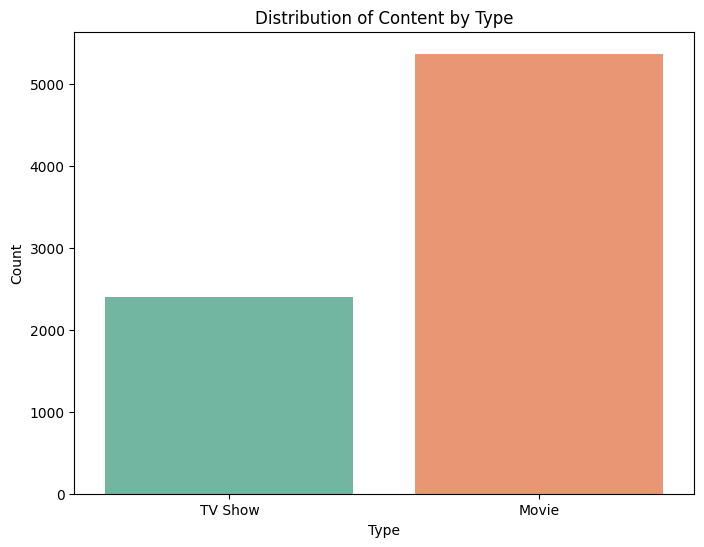

In [17]:
#Distribution of Content by Type
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=data, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

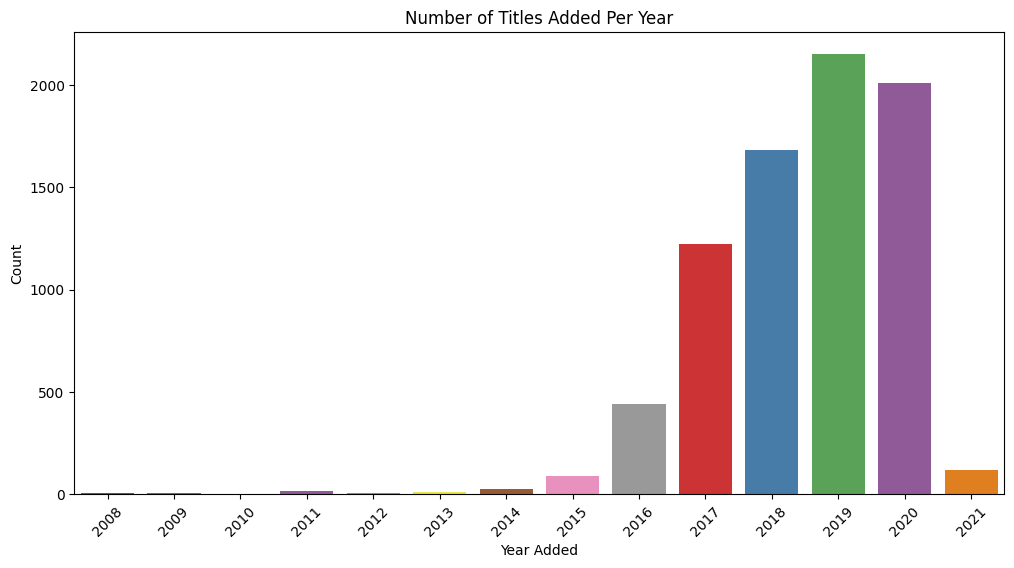

In [18]:
#Number of Titles Added Per Year
plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=data, palette='Set1')
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

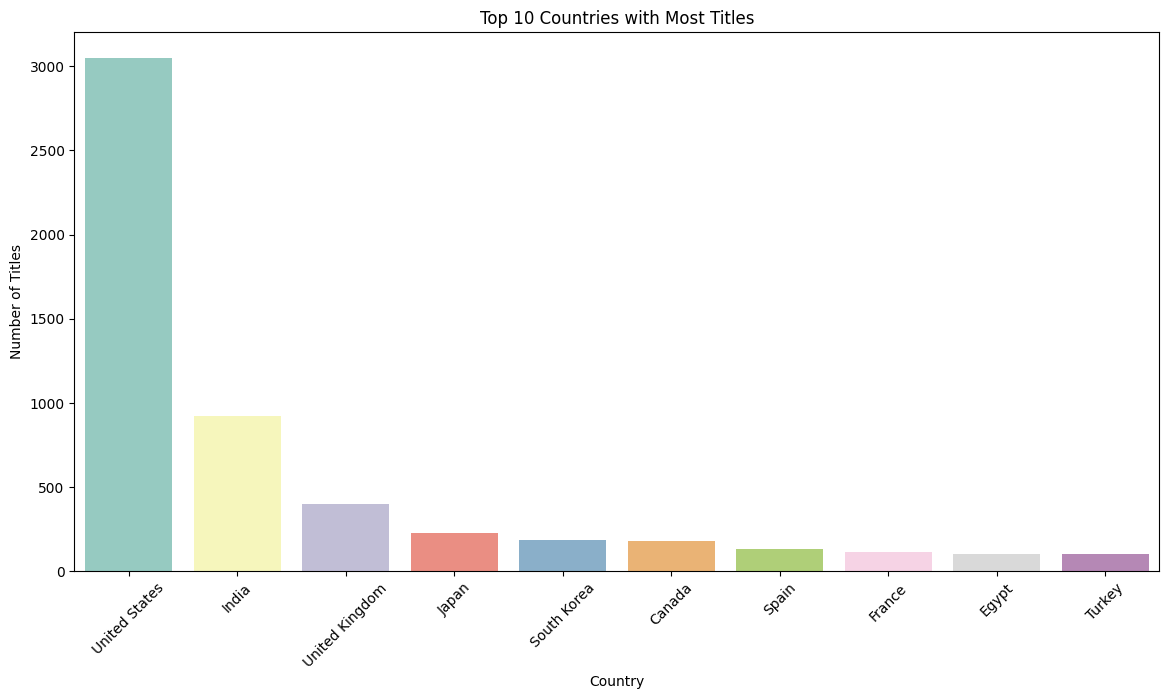

In [19]:
#Top 10 Countries with Most Titles
plt.figure(figsize=(14,7))
top_countries = data['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set3')
plt.title('Top 10 Countries with Most Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

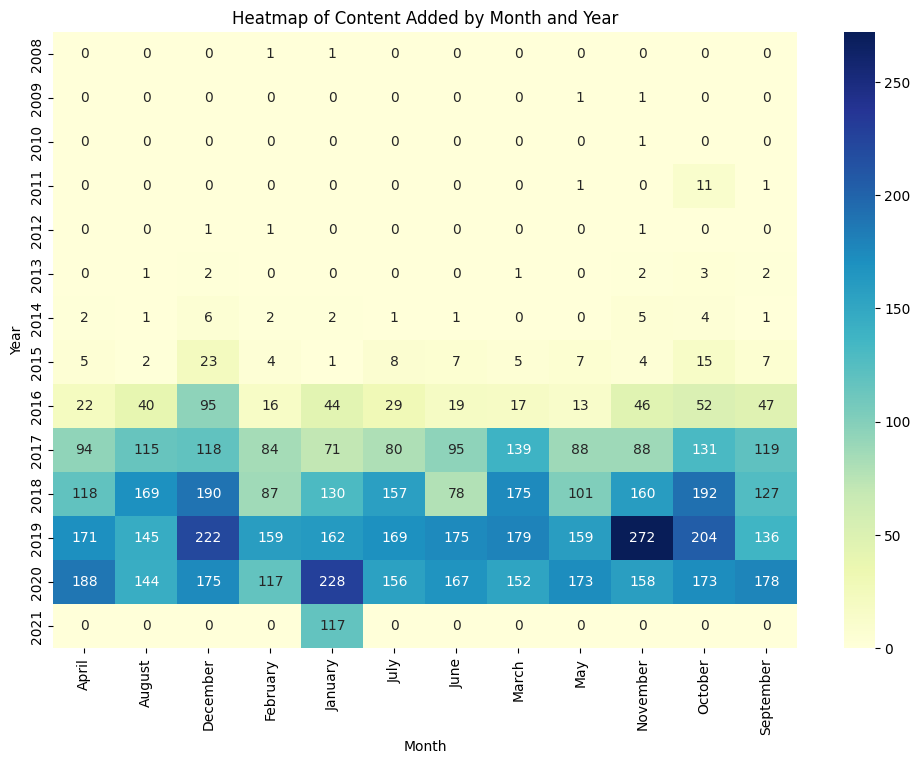

In [20]:
#Heatmap of Content Added by Month and Year
plt.figure(figsize=(12,8))
pivot_table = data.pivot_table(index='year_added', columns='month_name_added', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Content Added by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

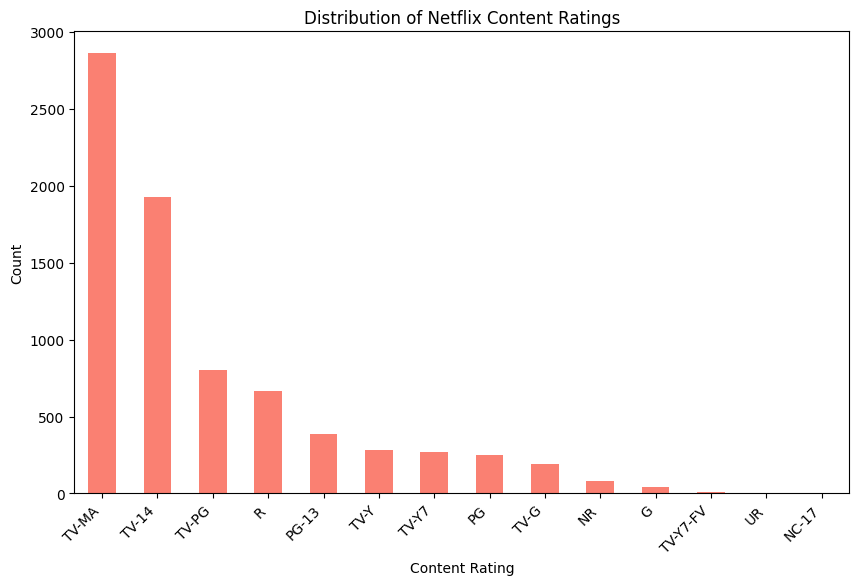

In [39]:
# Distribution of content ratings
plt.figure(figsize=(10, 6))
data['rating'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Netflix Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


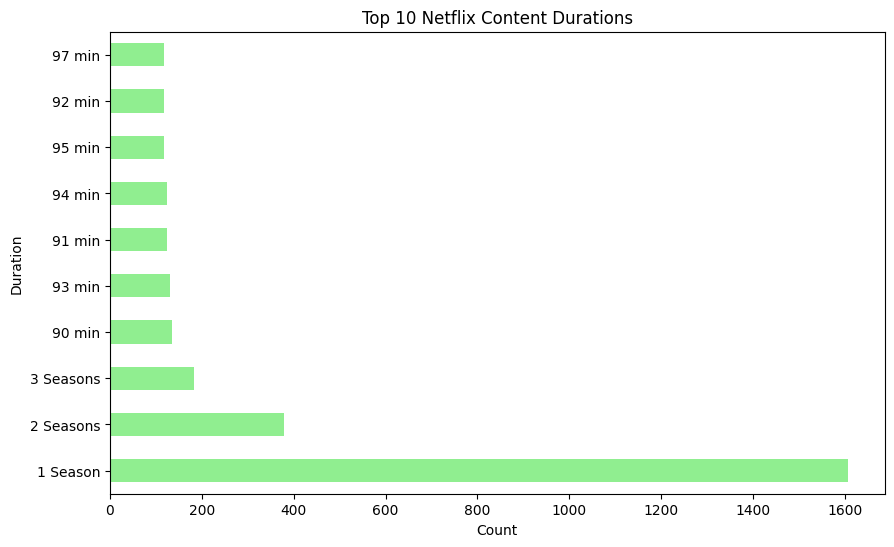

In [42]:
# Distribution of top 10 content durations
top_durations = data['duration'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_durations.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Netflix Content Durations')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

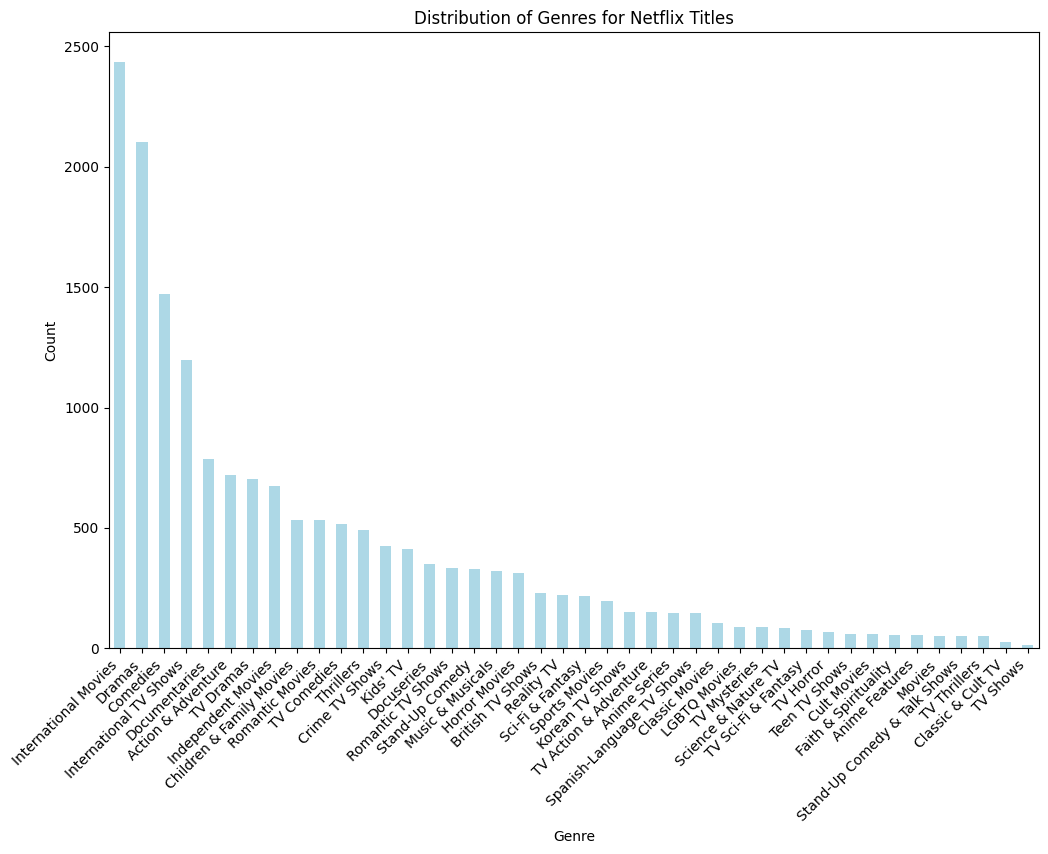

In [43]:
# Distribution of genres
genres = data['listed_in'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 8))
genres.plot(kind='bar', color='lightblue')
plt.title('Distribution of Genres for Netflix Titles')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

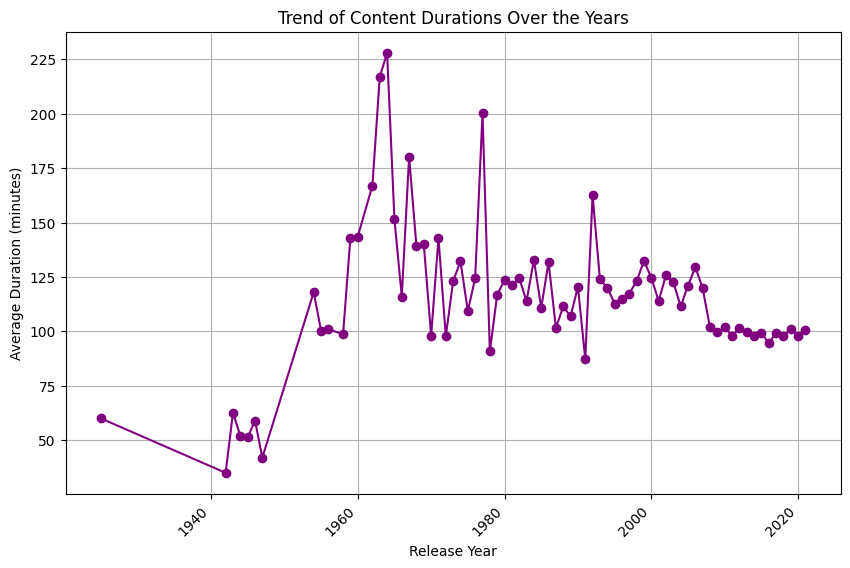

In [45]:
# Trend of content durations over the years
plt.figure(figsize=(10, 6))
data.groupby('release_year')['numeric_duration'].mean().plot(kind='line', marker='o', color='purple')
plt.title('Trend of Content Durations Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()